Kyes: <br>
API Key: qYkbR2yQ0Sq6TjwLrxblGxnQq
<br>
API Key Secret
AUNdgizVbIOlbHhBvZgkYNNksvU2Q5ogfrjzm01ojpkvIBlqtz
<br>
Access Token:
752673932340187140-5KkkuybSf5QLk1dt7Lq65Si5wXqLmTW
<br>
Access Token Secret:
kgGm6n4QbRNvAvmZwAlKyCg8AcljGtWJ15hSvSCxii1lL

<br>
Bearer Token: 
AAAAAAAAAAAAAAAAAAAAAKgzdAEAAAAAJLCj6SHmi7A9FEatJG4m5GEjhrU%3DNhpqA29ALA2C7RHjkunnjzs8qRuj7sto1cx6jnrCiaWArqUity

## Importing Packages and Loading files

In [126]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt

### Connecting with the Twitter API

In [127]:
# Assigning keys and secret keys

consumer_key = 'qYkbR2yQ0Sq6TjwLrxblGxnQq'
consumer_secret = 'AUNdgizVbIOlbHhBvZgkYNNksvU2Q5ogfrjzm01ojpkvIBlqtz'
access_token = '752673932340187140-5KkkuybSf5QLk1dt7Lq65Si5wXqLmTW'
access_token_secret = 'kgGm6n4QbRNvAvmZwAlKyCg8AcljGtWJ15hSvSCxii1lL'
bearer_key = 'AAAAAAAAAAAAAAAAAAAAAKgzdAEAAAAAJLCj6SHmi7A9FEatJG4m5GEjhrU%3DNhpqA29ALA2C7RHjkunnjzs8qRuj7sto1cx6jnrCiaWArqUity'

In [128]:

# auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, bearer_key)
# # auth.set_access_token(access_token, access_token_secret)
 
# # api = tweepy.API(auth)
# # search_term = 'Money Heist'
# # no_of_tweets = 100
# # tweets = tweepy.Cursor(api.search_tweets, q = search_term).items(no_of_tweets)

In [129]:
# Authenticating server

client = tweepy.Client(consumer_key= consumer_key,
                        consumer_secret= consumer_secret,
                        access_token= access_token,
                        access_token_secret= access_token_secret, 
                        bearer_token=bearer_key)

In [130]:
# to find the type of api
type(client)

tweepy.client.Client

### Understanding the working of TextBlob

In [131]:
a = 'I am a Bad Cricket player'
b = 'I am a good Cricket player'
c = 'I am a Cricket player'

In [132]:
TextBlob(a).sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [133]:
TextBlob(a).sentiment .polarity

-0.6999999999999998

In [134]:
TextBlob(b).sentiment #.polarity

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [135]:
TextBlob(c).sentiment #.polarity

Sentiment(polarity=0.0, subjectivity=0.0)

### Iterate the data and convert the result in percentage

In [136]:
positive = 0
negative = 0
neutral  = 0
polarity = 0

In [137]:
# Searching name of the tweet
search_term = 'money heist'
no_of_tweets = 100

# Fetching tweets
tweets = client.search_recent_tweets(query=search_term, max_results=100)

In [138]:
# Tweets
for tweet in tweets.data:
    print(tweet)

@MPelletierCIO It's about preparing the ground to transfer free money to political insiders. The biggest heist in human history is near.
@ruestyls definitely excited for insider and money heist korea !
OMG MONEY HEIST KOREA
RT @hyem_bot: [220527] 🐹💭 10:08 PM  

“i’m looking forward to money heist (korean remake)🥺 jeon jongseo nim is so pretty”

“yes you are pre…
@Team_Faruqui HALKI SI BARSAAT FT MUNAWAR
Money heist
RT @KhanzadaTweets: عمران خان نے قوم کو ارتغرل دیکھنے کا مشورہ دیا تھا،
شہباز شریف کا "Money Heist" اردو میں ڈب کروا کے PTV پہ نشر کرنے کا…
RT @NetflixID: Berlin, Tokyo, Denver, Moscow, Rio, Nairobi, Helsinki, dan Oslo udah kumpul untuk perampokan mata uang baru Korea 🔥 Money He…
RT @parkhaesoo_pics: Park Hae-soo as Berlin

Money Heist: Korea - Joint Economic Area 

June 24, 2022 on Netflix https://t.co/IGSJjeuiXF
RT @iconickdramas: Main poster of the Korean remake of Money Heist 🔥#MoneyHeistKorea_JointEconomicArea https://t.co/yzKqRHAGaf
@ruestyls honestly I just wait for t

In [139]:
# Calling tweets and finding the polarity of the tweets

for tweet in tweets.data:
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity 

    if (analysis.sentiment.polarity == 0):
        neutral +=1
        
    elif (analysis.sentiment.polarity < 0.00):
        negative +=1

    elif (analysis.sentiment.polarity > 0.00):
        positive +=1

In [140]:
print(positive)
print(negative)
print(neutral)

print(polarity)

39
23
38
3.7460097402597397


In [141]:
# Defining a function to calculate the percentage

def percentage(part, whole):
    return 100 * float(part) / float(whole)
    

In [142]:
positive = percentage(positive, no_of_tweets)
negative = percentage(negative, no_of_tweets)
neutral = percentage(neutral, no_of_tweets)
polarity = percentage(polarity, no_of_tweets)


In [143]:
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [144]:
print(positive)
print(negative)
print(neutral)
print(polarity)

39.00
23.00
38.00
3.7460097402597397


In [145]:
print("Reaction of the people on " + search_term +
    " By Analyzing " + str(no_of_tweets) + " Tweets")

if (polarity ==0):
    print(" is 'Neurtral'")

elif (polarity < 0.00):
    print(" is 'Negative'")

if (polarity > 0.00):
    print(" is 'Positive'")

Reaction of the people on money heist By Analyzing 100 Tweets
 is 'Positive'


### Getting the result of analysis

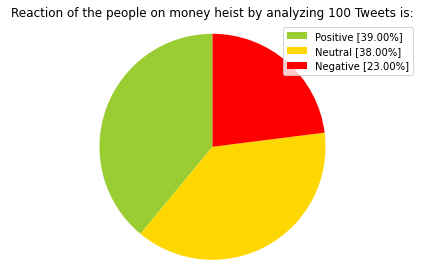

In [146]:
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('Reaction of the people on '
          + search_term +' by analyzing '
          + str(no_of_tweets) +' Tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()